In [53]:
import pandas as pd


In [54]:
data = pd.read_csv('/Users/vedantgupta/Documents/summer project/data-analysis-with-technical-indicators-2/nifty_sensex_close_data/data/Sensex_2011_to_2023(separated).csv')

In [55]:
mnm = data[['Date','M&M.NS(close)']]
mnm

,Date,M&M.NS(close)
0,2011-01-03,354.620422
1,2011-01-04,351.783600
2,2011-01-05,347.190735
3,2011-01-06,347.280792
4,2011-01-07,333.344513
...,...,...
3199,2023-12-22,1634.250000
3200,2023-12-26,1662.250000
3201,2023-12-27,1687.949951
3202,2023-12-28,1734.449951


In [56]:
#parameters
n = 12
m = 26
t = 9

In [57]:

mnm.loc[:,'EMAn'] = mnm['M&M.NS(close)'].ewm(span=n, adjust=False).mean()

mnm.loc[:,'EMAm'] = mnm['M&M.NS(close)'].ewm(span=m, adjust=False).mean()


/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_88215/1411935539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm.loc[:,'EMAn'] = mnm['M&M.NS(close)'].ewm(span=n, adjust=False).mean()
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_88215/1411935539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm.loc[:,'EMAm'] = mnm['M&M.NS(close)'].ewm(span=m, adjust=False).mean()


In [58]:
for i in range(n):
    mnm.loc[i,'EMAn'] = None
for i in range(m):
    mnm.loc[i,'EMAm'] = None
    

In [59]:

mnm['MACD'] = mnm['EMAn'] - mnm['EMAm']
mnm['Signal Line'] = mnm['MACD'].ewm(span=t, adjust=False).mean()
mnm[:15]

/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_88215/4062798950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm['MACD'] = mnm['EMAn'] - mnm['EMAm']
/var/folders/90/5g2l2f2j191dmr85qjr8jrn40000gn/T/ipykernel_88215/4062798950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm['Signal Line'] = mnm['MACD'].ewm(span=t, adjust=False).mean()


,Date,M&M.NS(close),EMAn,EMAm,MACD,Signal Line
0,2011-01-03,354.620422,NaN,NaN,NaN,NaN
1,2011-01-04,351.783600,NaN,NaN,NaN,NaN
2,2011-01-05,347.190735,NaN,NaN,NaN,NaN
3,2011-01-06,347.280792,NaN,NaN,NaN,NaN
4,2011-01-07,333.344513,NaN,NaN,NaN,NaN
5,2011-01-10,328.053772,NaN,NaN,NaN,NaN
6,2011-01-11,330.935547,NaN,NaN,NaN,NaN
7,2011-01-12,338.275146,NaN,NaN,NaN,NaN
8,2011-01-13,332.173859,NaN,NaN,NaN,NaN
9,2011-01-14,333.006866,NaN,NaN,NaN,NaN


In [60]:
trades = pd.DataFrame(columns=[['Date','Order Type','Price']])

In [61]:
for i in range(m+1,len(mnm.index)):
    if mnm.loc[i,'MACD'] > mnm.loc[i,'Signal Line'] and mnm.loc[i-1,'MACD'] < mnm.loc[i-1,'Signal Line']:
        trades.loc[len(trades.index)]  = [mnm.loc[i,'Date'],'Buy',mnm.loc[i,'M&M.NS(close)']]
    if mnm.loc[i,'MACD'] < mnm.loc[i,'Signal Line'] and mnm.loc[i-1,'MACD'] > mnm.loc[i-1,'Signal Line']:
        trades.loc[len(trades.index)]  = [mnm.loc[i,'Date'],'Sell',mnm.loc[i,'M&M.NS(close)']]

In [62]:

trades['Order Type'] = trades['Order Type'].astype(str)
if trades.loc[0]['Order Type'] == 'Sell':
    trades = trades[1:]

if trades.loc[len(trades.index)-1]['Order Type'] == 'Buy':
    trades._append({'Date':mnm.loc[len(mnm.index)-1,'Date'],'Order Type':'Sell','Price':mnm.loc[len(mnm.index)-1,'M&M.NS(close)']},ignore_index=True)

trades.reset_index(inplace = True)
trades


,index,Date,Order Type,Price
0,0,2011-02-14,Buy,306.237488
1,1,2011-02-24,Sell,277.374359
2,2,2011-03-01,Buy,299.122986
3,3,2011-05-02,Sell,333.952484
4,4,2011-05-27,Buy,317.404510
...,...,...,...,...
240,240,2023-10-16,Buy,1574.550049
241,241,2023-10-26,Sell,1506.099976
242,242,2023-11-09,Buy,1552.050049
243,243,2023-12-20,Sell,1646.949951


In [63]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(trades)

    index        Date Order Type        Price
0       0  2011-02-14        Buy   306.237488
1       1  2011-02-24       Sell   277.374359
2       2  2011-03-01        Buy   299.122986
3       3  2011-05-02       Sell   333.952484
4       4  2011-05-27        Buy   317.404510
5       5  2011-05-30       Sell   298.560181
6       6  2011-06-13        Buy   299.077942
7       7  2011-06-17       Sell   290.027344
8       8  2011-06-24        Buy   303.400696
9       9  2011-07-20       Sell   318.185242
10     10  2011-07-25        Buy   337.416534
11     11  2011-07-27       Sell   323.889221
12     12  2011-08-12        Buy   333.651428
13     13  2011-08-23       Sell   319.808411
14     14  2011-08-30        Buy   332.839844
15     15  2011-09-23       Sell   349.703857
16     16  2011-10-25        Buy   385.010132
17     17  2011-11-08       Sell   376.803650
18     18  2011-12-02        Buy   338.115448
19     19  2011-12-12       Sell   308.039734
20     20  2011-12-22        Buy  

In [64]:
profits = 0
losses = 0
for i in range(1,len(trades.index)):
    if(trades.loc[i]['Price'] - trades.loc[i-1]['Price'] > 0):
        profits += trades.loc[i]['Price'] - trades.loc[i-1]['Price']
    else:
        losses += trades.loc[i-1]['Price'] - trades.loc[i]['Price']

net_profit = profits - losses
profit_factor = profits/losses
num = len(trades.index)
print('Number of Trades:',num)
print('Net Profit:',net_profit)
print('Profit Factor:',profit_factor)

Number of Trades: 245
Net Profit: 1423.1625366210938
Profit Factor: 1.4730614013323309


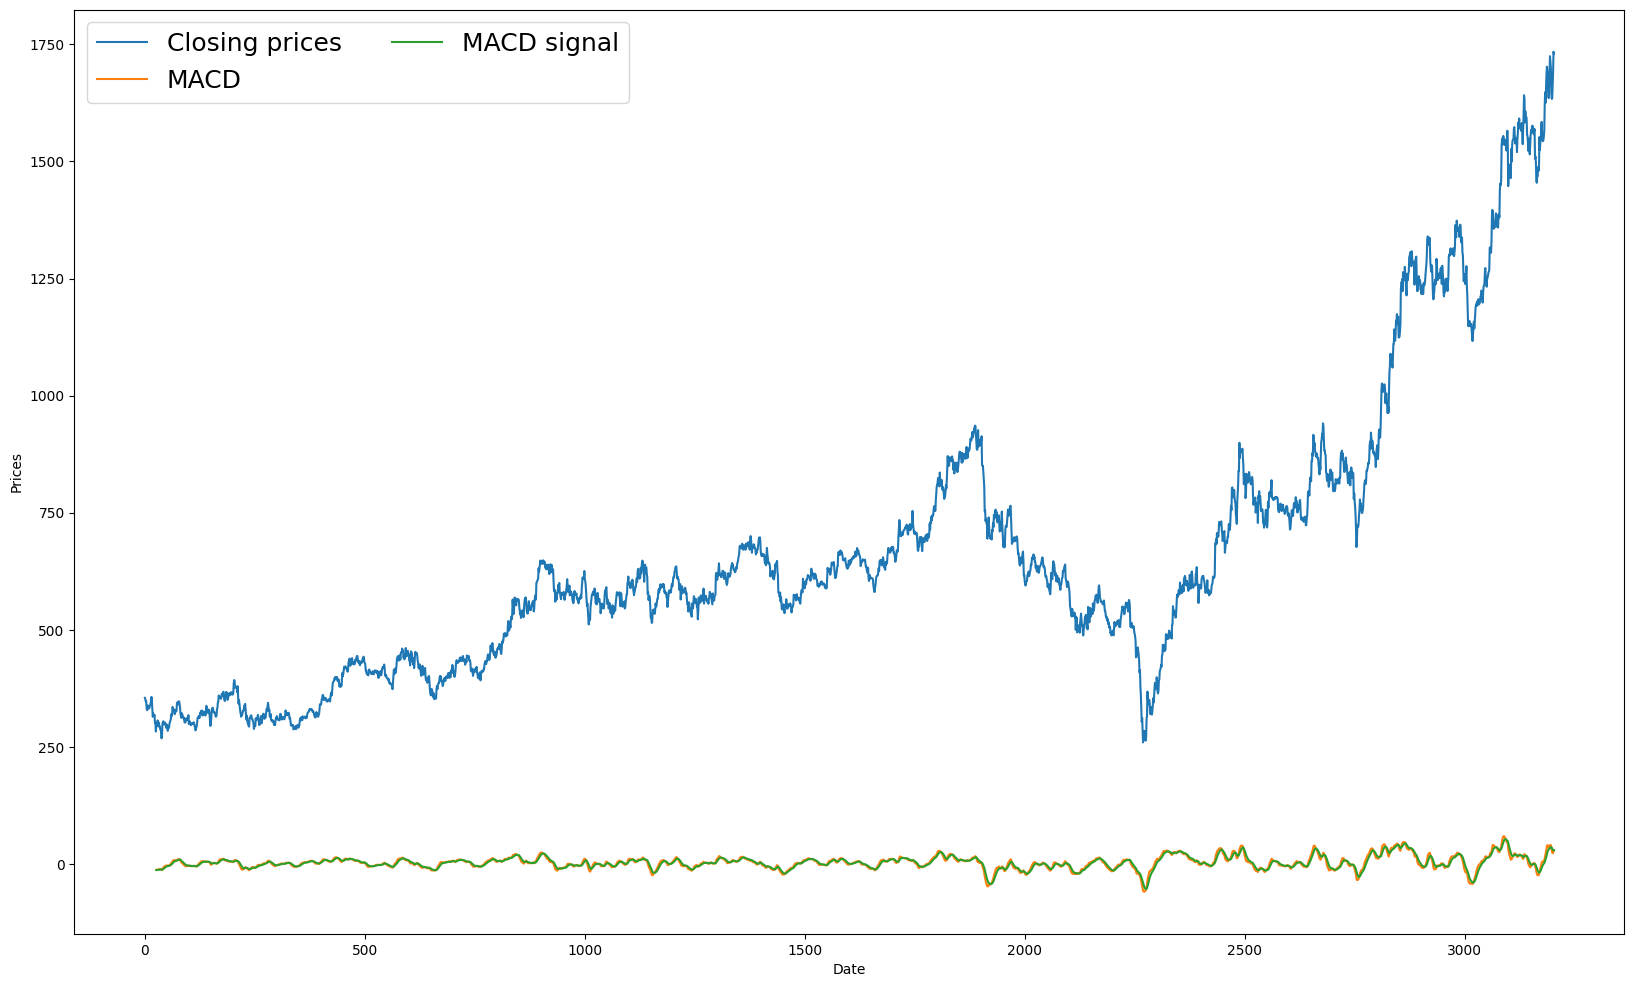

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))

plt.plot(mnm["M&M.NS(close)"], label = "Closing prices")
plt.plot(mnm["MACD"], label = "MACD")
plt.plot(mnm["Signal Line"], label = "MACD signal")

plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(fontsize=18, ncols = 2)
plt.show()


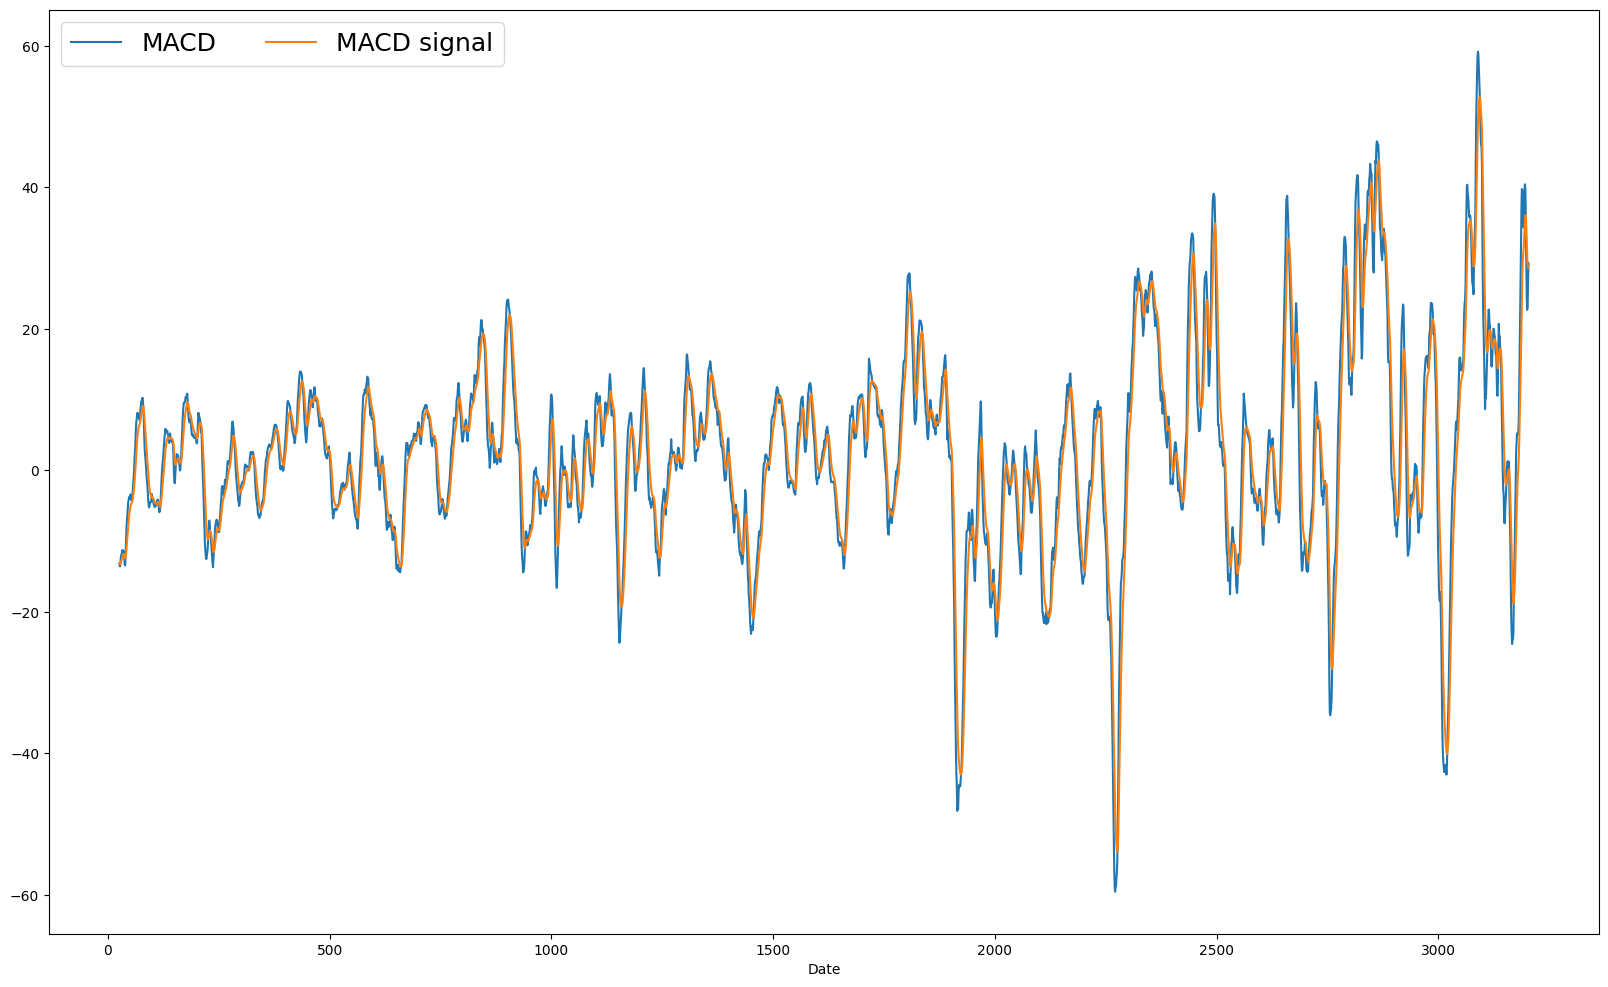

In [66]:
plt.figure(figsize=(20,12))
plt.plot(mnm["MACD"], label = "MACD")
plt.plot(mnm["Signal Line"], label = "MACD signal")
plt.xlabel("Date")
plt.legend(fontsize=18, ncols = 2)
plt.show()


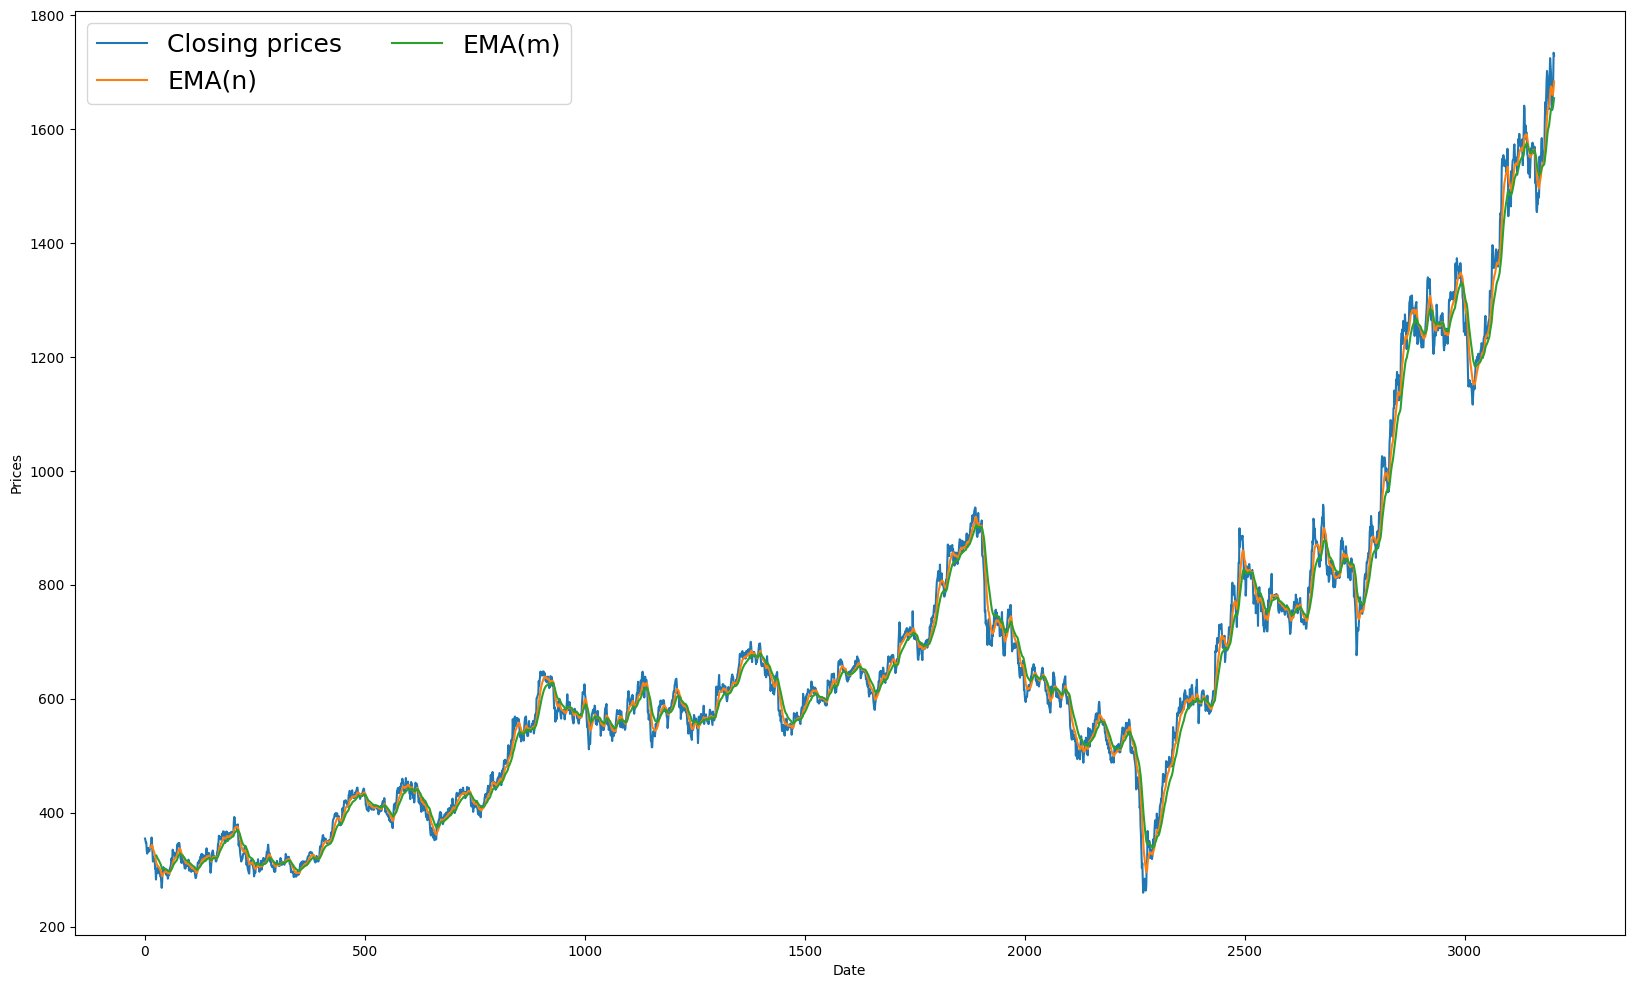

In [67]:
#plot ema
plt.figure(figsize=(20,12))
plt.plot(mnm["M&M.NS(close)"], label = "Closing prices")
plt.plot(mnm["EMAn"], label = "EMA(n)")
plt.plot(mnm["EMAm"], label = "EMA(m)")
plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(fontsize=18, ncols = 2)
plt.show()

In [68]:
trades


,index,Date,Order Type,Price
0,0,2011-02-14,Buy,306.237488
1,1,2011-02-24,Sell,277.374359
2,2,2011-03-01,Buy,299.122986
3,3,2011-05-02,Sell,333.952484
4,4,2011-05-27,Buy,317.404510
...,...,...,...,...
240,240,2023-10-16,Buy,1574.550049
241,241,2023-10-26,Sell,1506.099976
242,242,2023-11-09,Buy,1552.050049
243,243,2023-12-20,Sell,1646.949951


In [71]:
trades['Order Type'] = trades['Order Type'].astype(str)
trades['Price'] = trades['Price'].astype(float)